# Mini Project: Tree-Based Algorithms

## The "German Credit" Dataset

### Dataset Details

This dataset has two classes (these would be considered labels in Machine Learning terms) to describe the worthiness of a personal loan: "Good" or "Bad". There are predictors related to attributes, such as: checking account status, duration, credit history, purpose of the loan, amount of the loan, savings accounts or bonds, employment duration, installment rate in percentage of disposable income, personal information, other debtors/guarantors, residence duration, property, age, other installment plans, housing, number of existing credits, job information, number of people being liable to provide maintenance for, telephone, and foreign worker status.

Many of these predictors are discrete and have been expanded into several 0/1 indicator variables (a.k.a. they have been one-hot-encoded).

This dataset has been kindly provided by Professor Dr. Hans Hofmann of the University of Hamburg, and can also be found on the UCI Machine Learning Repository.

## Decision Trees

 As we have learned in the previous lectures, Decision Trees as a family of algorithms (irrespective to the particular implementation) are powerful algorithms that can produce models with a predictive accuracy higher than that produced by linear models, such as Linear or Logistic Regression. Primarily, this is due to the fact the DT's can model nonlinear relationships, and also have a number of tuning paramters, that allow for the practicioner to achieve the best possible model. An added bonus is the ability to visualize the trained Decision Tree model, which allows for some insight into how the model has produced the predictions that it has. One caveat here, to keep in mind, is that sometimes, due to the size of the dataset (both in the sense of the number of records, as well as the number of features), the visualization might prove to be very large and complex, increasing the difficulty of interpretation.

To give you a very good example of how Decision Trees can be visualized and interpreted, we would strongly recommend that, before continuing on with solving the problems in this Mini Project, you take the time to read this fanstastic, detailed and informative blog post: http://explained.ai/decision-tree-viz/index.html

## Building Your First Decision Tree Model

So, now it's time to jump straight into the heart of the matter. Your first task, is to build a Decision Tree model, using the aforementioned "German Credit" dataset, which contains 1,000 records, and 62 columns (one of them presents the labels, and the other 61 present the potential features for the model.)

For this task, you will be using the scikit-learn library, which comes already pre-installed with the Anaconda Python distribution. In case you're not using that, you can easily install it using pip.

Before embarking on creating your first model, we would strongly encourage you to read the short tutorial for Decision Trees in scikit-learn (http://scikit-learn.org/stable/modules/tree.html), and then dive a bit deeper into the documentation of the algorithm itself (http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html). 

Also, since you want to be able to present the results of your model, we suggest you take a look at the tutorial for accuracy metrics for classification models (http://scikit-learn.org/stable/modules/model_evaluation.html#classification-report) as well as the more detailed documentation (http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html).

Finally, an *amazing* resource that explains the various classification model accuracy metrics, as well as the relationships between them, can be found on Wikipedia: https://en.wikipedia.org/wiki/Confusion_matrix

(Note: as you've already learned in the Logistic Regression mini project, a standard practice in Machine Learning for achieving the best possible result when training a model is to use hyperparameter tuning, through Grid Search and k-fold Cross Validation. We strongly encourage you to use it here as well, not just because it's standard practice, but also becuase it's not going to be computationally to intensive, due to the size of the dataset that you're working with. Our suggestion here is that you split the data into 70% training, and 30% testing. Then, do the hyperparameter tuning and Cross Validation on the training set, and afterwards to a final test on the testing set.)

### Now we pass the torch onto you! You can start building your first Decision Tree model! :)

In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [2]:
df = pd.read_csv('GermanCredit.csv')

In [3]:
df.tail()

,Duration,Amount,InstallmentRatePercentage,ResidenceDuration,Age,NumberExistingCredits,NumberPeopleMaintenance,Telephone,ForeignWorker,Class,...,OtherInstallmentPlans.Bank,OtherInstallmentPlans.Stores,OtherInstallmentPlans.None,Housing.Rent,Housing.Own,Housing.ForFree,Job.UnemployedUnskilled,Job.UnskilledResident,Job.SkilledEmployee,Job.Management.SelfEmp.HighlyQualified
995,12,1736,3,4,31,1,1,1,1,Good,...,0,0,1,0,1,0,0,1,0,0
996,30,3857,4,4,40,1,1,0,1,Good,...,0,0,1,0,1,0,0,0,0,1
997,12,804,4,4,38,1,1,1,1,Good,...,0,0,1,0,1,0,0,0,1,0
998,45,1845,4,4,23,1,1,0,1,Bad,...,0,0,1,0,0,1,0,0,1,0
999,45,4576,3,4,27,1,1,1,1,Good,...,0,0,1,0,1,0,0,0,1,0


In [12]:
# Some EDA
# import seaborn as sns
# sns.pairplot(df.iloc[:5], hue='Class')

In [4]:
# spliting data to test and train set
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

X = df.drop('Class', axis=1)
y= df['Class'].copy()
y_transformed= encoder.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y_transformed, test_size=0.3, random_state=42)

In [5]:
# defining functions for model evaluations
from matplotlib import pyplot as plt

def roc_plot(clf, y_true, X):
    y_predict = clf.predict(X)
    fpr, tpr, _= metrics.roc_curve(y_true, y_predict)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange')
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()


   
def classification_metrics(clf, y_true, X):
    y_predict = clf.predict(X)
    fpr, tpr, _ = metrics.roc_curve(y_true, y_predict)
#     print(classification_report(y_true, y_predict))
    result={'accuracy':metrics.accuracy_score(y_true, y_predict),
            'roc_auc_score': metrics.roc_auc_score(y_true, clf.predict_proba(X)[:,1]),
            'Roc_Auc': metrics.auc(fpr, tpr)}
    return result


No handles with labels found to put in legend.


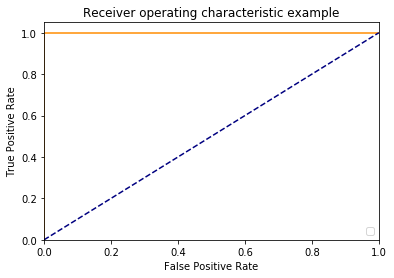

No handles with labels found to put in legend.


**************************************************


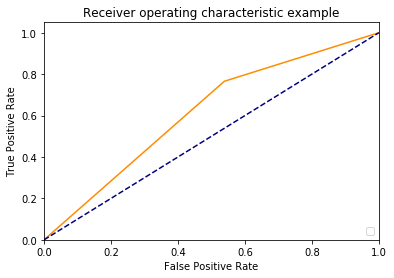

In [8]:
# # decision tree classifier # max_depth=6, min_samples_leaf=5
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

# report model performance on training set
classification_metrics(clf, y_train, X_train)
roc_plot(clf, y_train, X_train)

print("*****"*10)
# report model performance on test set
classification_metrics(clf, y_test, X_test)
roc_plot(clf, y_test, X_test)


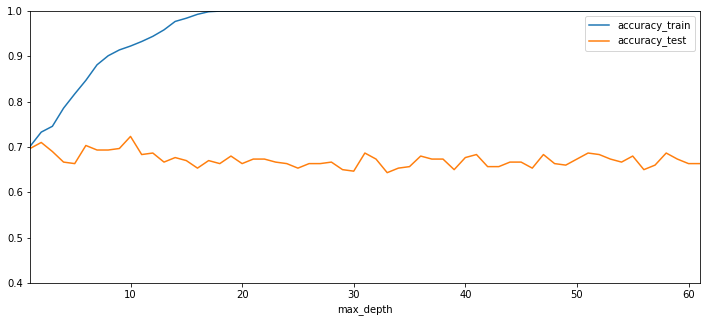

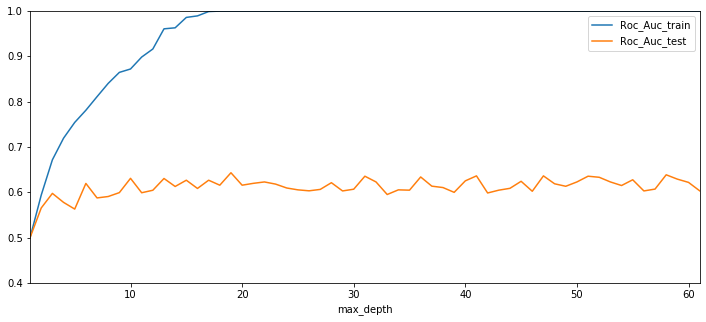

In [9]:
# now testing several key parameters 
#1) max_depth

results=[]
max_depth_range = np.linspace(1,X.shape[1], X.shape[1], endpoint=True)
for max_depth in max_depth_range:
    clf = DecisionTreeClassifier(max_depth=max_depth)
    clf = clf.fit(X_train, y_train)
    results.append({
        'max_depth': max_depth,
        'accuracy_train' : classification_metrics(clf, y_train, X_train)['accuracy'],
        'accuracy_test' : classification_metrics(clf, y_test, X_test)['accuracy'],
        'Roc_Auc_train' : classification_metrics(clf, y_train, X_train)['Roc_Auc'],
        'Roc_Auc_test' : classification_metrics(clf, y_test, X_test)['Roc_Auc']
    })

df_max_depth = pd.DataFrame(results).set_index('max_depth').sort_index()
df_max_depth

df_max_depth[['accuracy_train','accuracy_test']].plot(ylim=(0.4, 1), figsize=(12,5))
df_max_depth[['Roc_Auc_train','Roc_Auc_test']].plot(ylim=(0.4, 1), figsize=(12,5))
# we can see here that model overfits as we increase the max_depth (optimal values for max_depth can be [5,15])

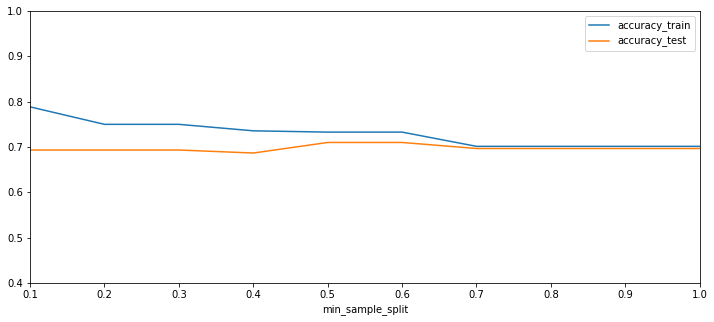

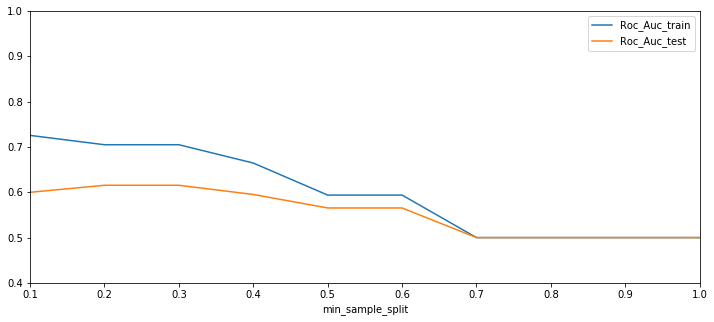

In [10]:
#2) min_sample_splits

results=[]
min_sample_split_range = np.linspace(0.1,1.0,10, endpoint=True)
for min_sample_split in min_sample_split_range:
    clf = DecisionTreeClassifier(min_samples_split=min_sample_split)
    clf = clf.fit(X_train, y_train)
    results.append({
        'min_sample_split': min_sample_split,
        'accuracy_train' : classification_metrics(clf, y_train, X_train)['accuracy'],
        'accuracy_test' : classification_metrics(clf, y_test, X_test)['accuracy'],
        'Roc_Auc_train' : classification_metrics(clf, y_train, X_train)['Roc_Auc'],
        'Roc_Auc_test' : classification_metrics(clf, y_test, X_test)['Roc_Auc']
    })

df_min_sample_split = pd.DataFrame(results).set_index('min_sample_split').sort_index()
df_min_sample_split

df_min_sample_split[['accuracy_train','accuracy_test']].plot(ylim=(0.4, 1), figsize=(12,5))
df_min_sample_split[['Roc_Auc_train','Roc_Auc_test']].plot(ylim=(0.4, 1), figsize=(12,5))
# we can see here that the model accuracy decreases as min-sample-splits increases (optimal values for min-sample-split can be <.5)

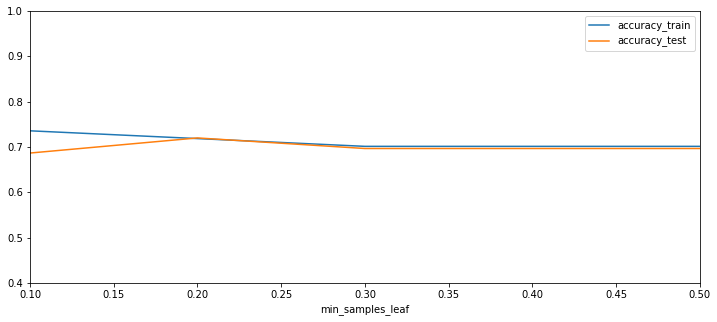

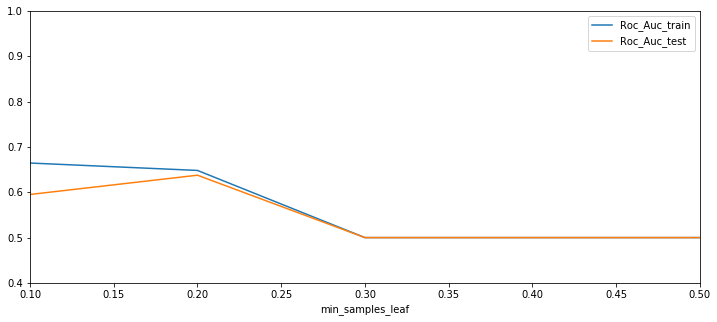

In [11]:
#3) min_sample_leaf

results=[]
min_sample_leafs_range = np.linspace(0.1,0.5,5, endpoint=True)
for min_samples_leaf in min_sample_leafs_range:
    clf = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf)
    clf = clf.fit(X_train, y_train)
    results.append({
        'min_samples_leaf': min_samples_leaf,
        'accuracy_train' : classification_metrics(clf, y_train, X_train)['accuracy'],
        'accuracy_test' : classification_metrics(clf, y_test, X_test)['accuracy'],
        'Roc_Auc_train' : classification_metrics(clf, y_train, X_train)['Roc_Auc'],
        'Roc_Auc_test' : classification_metrics(clf, y_test, X_test)['Roc_Auc']
    })

df_min_samples_leaf = pd.DataFrame(results).set_index('min_samples_leaf').sort_index()
df_min_samples_leaf

df_min_samples_leaf[['accuracy_train','accuracy_test']].plot(ylim=(0.4, 1), figsize=(12,5))
df_min_samples_leaf[['Roc_Auc_train','Roc_Auc_test']].plot(ylim=(0.4, 1), figsize=(12,5))
# we can see here that the model accuracy decreases as min_samples_leaf increases (optimal values for min_samples_leaf can be <.2)

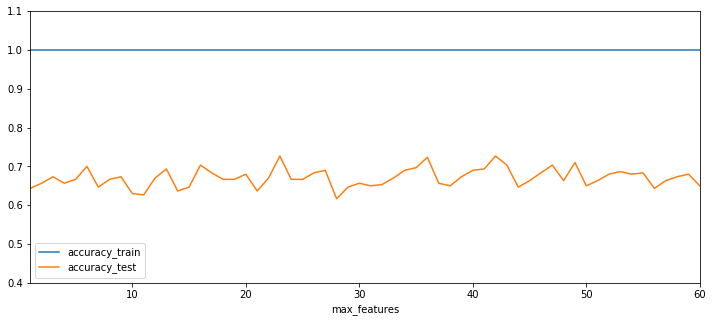

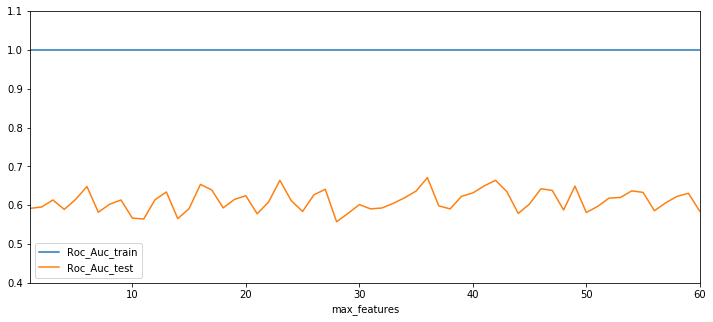

In [12]:
#4) max_features

results=[]
max_features_range = list(range(1, X.shape[1]))
for max_feature in max_features_range:
    clf = DecisionTreeClassifier(max_features=max_feature)
    clf = clf.fit(X_train, y_train)
    results.append({
        'max_features': max_feature,
        'accuracy_train' : classification_metrics(clf, y_train, X_train)['accuracy'],
        'accuracy_test' : classification_metrics(clf, y_test, X_test)['accuracy'],
        'Roc_Auc_train' : classification_metrics(clf, y_train, X_train)['Roc_Auc'],
        'Roc_Auc_test' : classification_metrics(clf, y_test, X_test)['Roc_Auc']
    })

df_max_features = pd.DataFrame(results).set_index('max_features').sort_index()
df_max_features

df_max_features[['accuracy_train','accuracy_test']].plot(ylim=(0.4, 1.1), figsize=(12,5))
df_max_features[['Roc_Auc_train','Roc_Auc_test']].plot(ylim=(0.4, 1.1), figsize=(12,5))
# we can see here that the model accuracy decreases as max_features increases (optimal values for max_features can be <30)

In [13]:
# now defining our hyperparameters all at once using Gridsearch and cross-validation
# conservative model (not overfitted)
tuned_parmas = [{
    'max_depth':np.linspace(1,30, 30, endpoint=True),
    'min_samples_split':np.linspace(0.1,0.8,8, endpoint=True),
    'min_samples_leaf':np.linspace(0.01,0.2,10, endpoint=True),
    'criterion':['gini','entropy'],
#     'max_features': list(range(1,40))
}]

clf_conservative = GridSearchCV(DecisionTreeClassifier(random_state=42), tuned_parmas, cv=5, scoring = 'roc_auc')

clf_conservative.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=42,
                                              splitter='best'),
             iid='warn', n_j...
                          'max_depth': array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 1

In [14]:
clf_conservative.best_params_

{'criterion': 'gini',
 'max_depth': 4.0,
 'min_samples_leaf': 0.11555555555555555,
 'min_samples_split': 0.1}

No handles with labels found to put in legend.


{'accuracy': 0.7357142857142858, 'roc_auc_score': 0.7464748243502666, 'Roc_Auc': 0.664589403521765}
              precision    recall  f1-score   support

           0       0.57      0.49      0.52       209
           1       0.79      0.84      0.82       491

    accuracy                           0.74       700
   macro avg       0.68      0.66      0.67       700
weighted avg       0.73      0.74      0.73       700



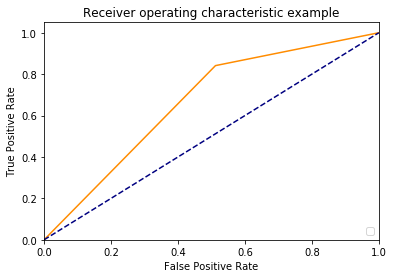

No handles with labels found to put in legend.


**************************************************
{'accuracy': 0.6866666666666666, 'roc_auc_score': 0.716231137283769, 'Roc_Auc': 0.5951942794048057}
              precision    recall  f1-score   support

           0       0.48      0.36      0.41        91
           1       0.75      0.83      0.79       209

    accuracy                           0.69       300
   macro avg       0.61      0.60      0.60       300
weighted avg       0.67      0.69      0.67       300



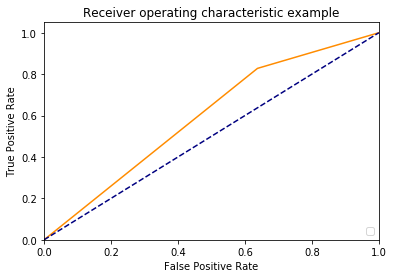

In [15]:
# checking the final model identified by GridSearchCV
clf_conservative = DecisionTreeClassifier(criterion='gini',
                                   max_depth=4.0, 
#                                    max_features=19, 
                                   min_samples_leaf=0.115,
                                   min_samples_split= 0.1)
clf_conservative = clf_conservative.fit(X_train, y_train)

# report model performance on training set
result_train = classification_metrics(clf_conservative, y_train, X_train)
print(result_train)
print(classification_report(y_train, clf_conservative.predict(X_train)))
roc_plot(clf_conservative, y_train, X_train)

print("*****"*10)
# report model performance on test set
result_test = classification_metrics(clf_conservative, y_test, X_test)
print(result_test)
print(classification_report(y_test, clf_conservative.predict(X_test)))
roc_plot(clf_conservative, y_test, X_test)

In [16]:
# now defining our hyperparameters all at once using Gridsearch and cross-validation
# radical approach (seems to be overfitted)
tuned_parmas = [{
    'max_depth':np.linspace(1,50, 50, endpoint=True),
    'min_samples_split':[0.00001, 0.001, .01, .05, .07, .09, .1, .13, .15, .17, .2, .3, .4, .5, .6, .7],
#     'min_samples_leaf':[1,2,3,4,5,7,10,15],
#     'criterion':['gini','entropy'],
#     'max_features': list(range(1,60))
}]

clf_radical = GridSearchCV(DecisionTreeClassifier(random_state=42), tuned_parmas, cv=5, scoring = 'roc_auc')

clf_radical.fit(X_train, y_train)

C:\Users\Farzad\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=42,
                                              splitter='best'),
             iid='warn', n_j...
             param_grid=[{'max_depth': array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 1

In [17]:
clf_radical.best_params_

{'max_depth': 11.0, 'min_samples_split': 0.09}

No handles with labels found to put in legend.


{'accuracy': 0.7885714285714286, 'roc_auc_score': 0.852010836199924, 'Roc_Auc': 0.7256258587590992}
              precision    recall  f1-score   support

           0       0.67      0.57      0.62       209
           1       0.83      0.88      0.85       491

    accuracy                           0.79       700
   macro avg       0.75      0.73      0.74       700
weighted avg       0.78      0.79      0.78       700



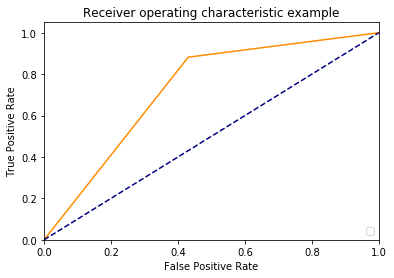

No handles with labels found to put in legend.


**************************************************
{'accuracy': 0.6933333333333334, 'roc_auc_score': 0.6772700983227299, 'Roc_Auc': 0.5999789684000211}
              precision    recall  f1-score   support

           0       0.49      0.36      0.42        91
           1       0.75      0.84      0.79       209

    accuracy                           0.69       300
   macro avg       0.62      0.60      0.60       300
weighted avg       0.67      0.69      0.68       300



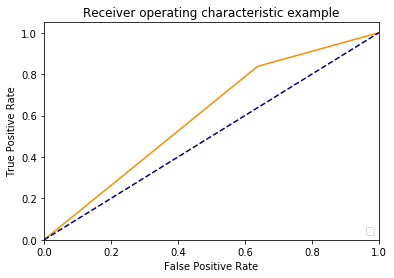

In [18]:
# checking the final model identified by GridSearchCV
clf_radical = DecisionTreeClassifier(max_depth=11, min_samples_split=0.09)
clf_radical = clf_radical.fit(X_train, y_train)

# report model performance on training set
result_train = classification_metrics(clf_radical, y_train, X_train)
print(result_train)
print(classification_report(y_train, clf_radical.predict(X_train)))
roc_plot(clf_radical, y_train, X_train)

print("*****"*10)
# report model performance on test set
result_test = classification_metrics(clf_radical, y_test, X_test)
print(result_test)
print(classification_report(y_test, clf_radical.predict(X_test)))
roc_plot(clf_radical, y_test, X_test)

In [177]:
# conservative model seems to underfit training and less overfitted on test dataset
# Radical model seems to fit well on training and more overfitted on test dataset

### After you've built the best model you can, now it's time to visualize it!

Rememeber that amazing blog post from a few paragraphs ago, that demonstrated how to visualize and interpret the results of your Decision Tree model. We've seen that this can perform very well, but let's see how it does on the "German Credit" dataset that we're working on, due to it being a bit larger than the one used by the blog authors.

First, we're going to need to install their package. If you're using Anaconda, this can be done easily by running:

In [19]:
# ! pip install dtreeviz
from dtreeviz.trees import *

viz = dtreeviz(clf_conservative, 
               X_train, 
               y_train,
               target_name='Credit',
               feature_names=X_train.columns.values, 
               class_names=["Good", "Bad"])  
              
viz.view() 

In [20]:
viz = dtreeviz(clf_radical, 
               X_train, 
               y_train,
               target_name='Credit',
               feature_names=X_train.columns.values, 
               class_names=["Good", "Bad"])  
              
viz.view() 

If for any reason this way of installing doesn't work for you straight out of the box, please refer to the more detailed documentation here: https://github.com/parrt/dtreeviz

Now you're ready to visualize your Decision Tree model! Please feel free to use the blog post for guidance and inspiration!

## Random Forests

As discussed in the lecture videos, Decision Tree algorithms also have certain undesireable properties. Mainly the have low bias, which is good, but tend to have high variance - which is *not* so good (more about this problem here: https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff).

Noticing these problems, the late Professor Leo Breiman, in 2001, developed the Random Forests algorithm, which mitigates these problems, while at the same time providing even higher predictive accuracy than the majority of Decision Tree algorithm implementations. While the curriculum contains two excellent lectures on Random Forests, if you're interested, you can dive into the original paper here: https://link.springer.com/content/pdf/10.1023%2FA%3A1010933404324.pdf.

In the next part of this assignment, your are going to use the same "German Credit" dataset to train, tune, and measure the performance of a Random Forests model. You will also see certain functionalities that this model, even though it's a bit of a "black box", provides for some degree of interpretability.

First, let's build a Random Forests model, using the same best practices that you've used for your Decision Trees model. You can reuse the things you've already imported there, so no need to do any re-imports, new train/test splits, or loading up the data again.

In [21]:
from sklearn.ensemble import RandomForestClassifier

No handles with labels found to put in legend.


{'accuracy': 0.9871428571428571, 'roc_auc_score': 0.9991570761749774, 'Roc_Auc': 0.9839649577563608}
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       209
           1       0.99      0.99      0.99       491

    accuracy                           0.99       700
   macro avg       0.99      0.98      0.98       700
weighted avg       0.99      0.99      0.99       700



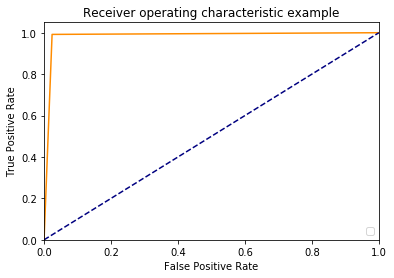

No handles with labels found to put in legend.


**************************************************
{'accuracy': 0.74, 'roc_auc_score': 0.7642357642357642, 'Roc_Auc': 0.6737998843262001}
              precision    recall  f1-score   support

           0       0.58      0.51      0.54        91
           1       0.80      0.84      0.82       209

    accuracy                           0.74       300
   macro avg       0.69      0.67      0.68       300
weighted avg       0.73      0.74      0.73       300



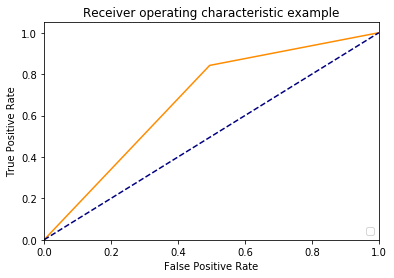

In [22]:
# basic random Forest Classifier
clf = RandomForestClassifier(n_estimators=10)
clf = clf.fit(X_train, y_train)

# report model performance on training set
result_training = classification_metrics(clf, y_train, X_train)
print(result_training)
print(classification_report(y_train, clf.predict(X_train)))
roc_plot(clf, y_train, X_train)

print("*****"*10)
# report model performance on test set
result_test = classification_metrics(clf, y_test, X_test)
print(result_test)
print(classification_report(y_test, clf.predict(X_test)))
roc_plot(clf, y_test, X_test)

No handles with labels found to put in legend.


Amount                        0.093494
Age                           0.088112
Duration                      0.079716
CheckingAccountStatus.none    0.048072
CheckingAccountStatus.lt.0    0.032278
CreditHistory.Critical        0.031326
InstallmentRatePercentage     0.029551
ResidenceDuration             0.028976
Purpose.Radio.Television      0.026971
SavingsAccountBonds.lt.100    0.023209
dtype: float64


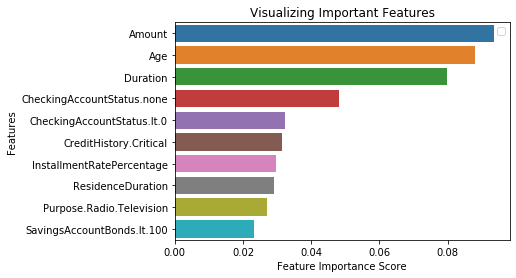

In [23]:
import seaborn as sns
%matplotlib inline

# here are the top 10 important factors
feature_imp = pd.Series(clf.feature_importances_,index=X_train.columns.values).sort_values(ascending=False)
print(feature_imp[:10])

# barplot
sns.barplot(x=feature_imp[:10], y=feature_imp.index[:10])
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

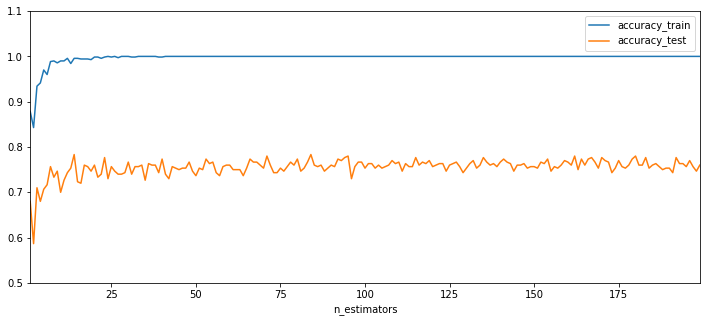

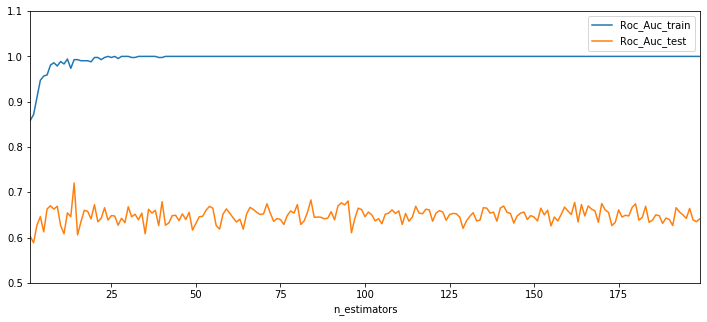

In [24]:
# now we are looking at the most important hyperparameters separatetly
# 1) n_estimators

results=[]
n_estimator_ranges = list(range(1, 200, 1))
for n_estimator in n_estimator_ranges:
    clf = RandomForestClassifier(n_estimators=n_estimator, n_jobs=-1)
    clf = clf.fit(X_train, y_train)
    results.append({
        'n_estimators': n_estimator,
        'accuracy_train' : classification_metrics(clf, y_train, X_train)['accuracy'],
        'accuracy_test' : classification_metrics(clf, y_test, X_test)['accuracy'],
        'Roc_Auc_train' : classification_metrics(clf, y_train, X_train)['Roc_Auc'],
        'Roc_Auc_test' : classification_metrics(clf, y_test, X_test)['Roc_Auc']
    })

df_n_estimator = pd.DataFrame(results).set_index('n_estimators').sort_index()
df_n_estimator

df_n_estimator[['accuracy_train','accuracy_test']].plot(ylim=(0.5, 1.1), figsize=(12,5))
df_n_estimator[['Roc_Auc_train','Roc_Auc_test']].plot(ylim=(0.5, 1.1), figsize=(12,5))
# we can see here that the model accuracy increases as n_estimator increases (optimal values can be >20) - 
# we can stop somewhere [15-25] for higher performance

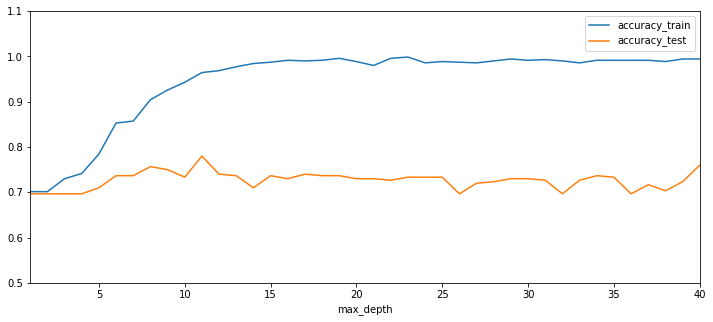

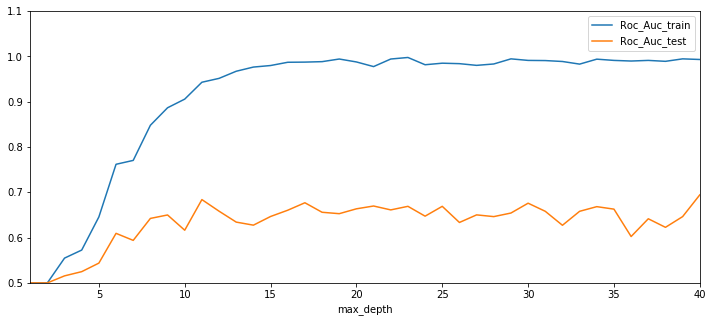

In [270]:
# 2) max_depth

results=[]
max_depth_ranges = np.linspace(1,40, 40, endpoint=True)
for max_depth in max_depth_ranges:
    clf = RandomForestClassifier(max_depth=max_depth, n_jobs=-1, n_estimators=10)
    clf = clf.fit(X_train, y_train)
    results.append({
        'max_depth': max_depth,
        'accuracy_train' : classification_metrics(clf, y_train, X_train)['accuracy'],
        'accuracy_test' : classification_metrics(clf, y_test, X_test)['accuracy'],
        'Roc_Auc_train' : classification_metrics(clf, y_train, X_train)['Roc_Auc'],
        'Roc_Auc_test' : classification_metrics(clf, y_test, X_test)['Roc_Auc']
    })

df_max_depth = pd.DataFrame(results).set_index('max_depth').sort_index()
df_max_depth

df_max_depth[['accuracy_train','accuracy_test']].plot(ylim=(0.5, 1.1), figsize=(12,5))
df_max_depth[['Roc_Auc_train','Roc_Auc_test']].plot(ylim=(0.5, 1.1), figsize=(12,5))
# we can see here that the model accuracy increases as max_depth increases with risk of overfitting(optimal values can be >15)

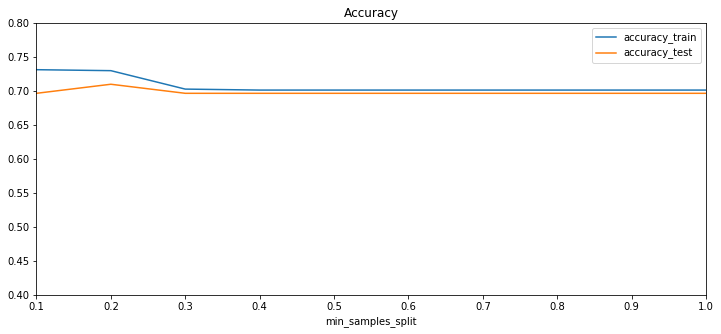

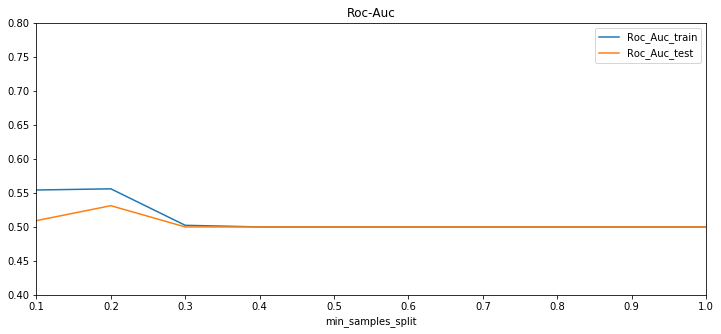

In [278]:
# 3) min_samples_split

results=[]
min_samples_split_ranges = np.linspace(0.1,1, 10, endpoint=True)
for min_samples_split in min_samples_split_ranges:
    clf = RandomForestClassifier(min_samples_split=min_samples_split, n_jobs=-1, n_estimators=10)
    clf = clf.fit(X_train, y_train)
    results.append({
        'min_samples_split': min_samples_split,
        'accuracy_train' : classification_metrics(clf, y_train, X_train)['accuracy'],
        'accuracy_test' : classification_metrics(clf, y_test, X_test)['accuracy'],
        'Roc_Auc_train' : classification_metrics(clf, y_train, X_train)['Roc_Auc'],
        'Roc_Auc_test' : classification_metrics(clf, y_test, X_test)['Roc_Auc']
    })

df_min_samples_split = pd.DataFrame(results).set_index('min_samples_split').sort_index()
df_min_samples_split

df_min_samples_split[['accuracy_train','accuracy_test']].plot(ylim=(0.4, 0.8), figsize=(12,5), title="Accuracy")
df_min_samples_split[['Roc_Auc_train','Roc_Auc_test']].plot(ylim=(0.4, 0.8), figsize=(12,5), title="Roc-Auc")
# Increasing this value can lead to underfitting (optimal range can be 0-0.3)

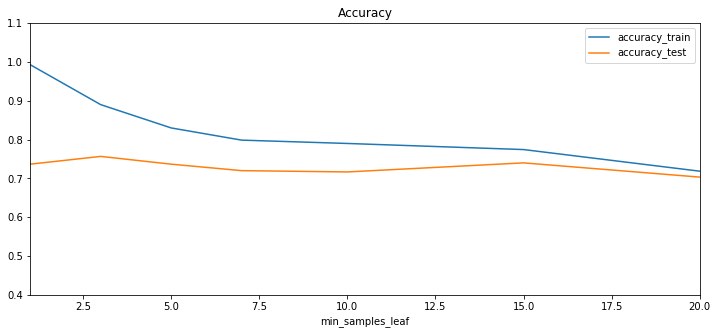

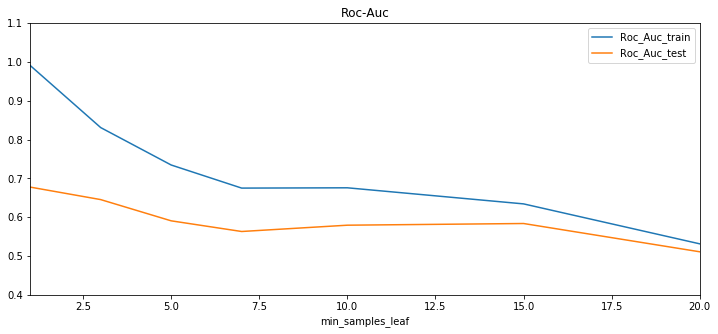

In [281]:
# 4) min_samples_leaf

results=[]
min_samples_leafs_range = [1, 3, 5, 7, 10, 15, 20]
for min_samples_leaf in min_samples_leafs_range:
    clf = RandomForestClassifier(min_samples_leaf=min_samples_leaf, n_jobs=-1, n_estimators=10)
    clf = clf.fit(X_train, y_train)
    results.append({
        'min_samples_leaf': min_samples_leaf,
        'accuracy_train' : classification_metrics(clf, y_train, X_train)['accuracy'],
        'accuracy_test' : classification_metrics(clf, y_test, X_test)['accuracy'],
        'Roc_Auc_train' : classification_metrics(clf, y_train, X_train)['Roc_Auc'],
        'Roc_Auc_test' : classification_metrics(clf, y_test, X_test)['Roc_Auc']
    })

df_min_samples_leaf = pd.DataFrame(results).set_index('min_samples_leaf').sort_index()
df_min_samples_leaf

df_min_samples_leaf[['accuracy_train','accuracy_test']].plot(ylim=(0.4, 1.1), figsize=(12,5), title="Accuracy")
df_min_samples_leaf[['Roc_Auc_train','Roc_Auc_test']].plot(ylim=(0.4, 1.1), figsize=(12,5), title="Roc-Auc")
# Increasing this value can lead to underfitting (optimal range can be <7)

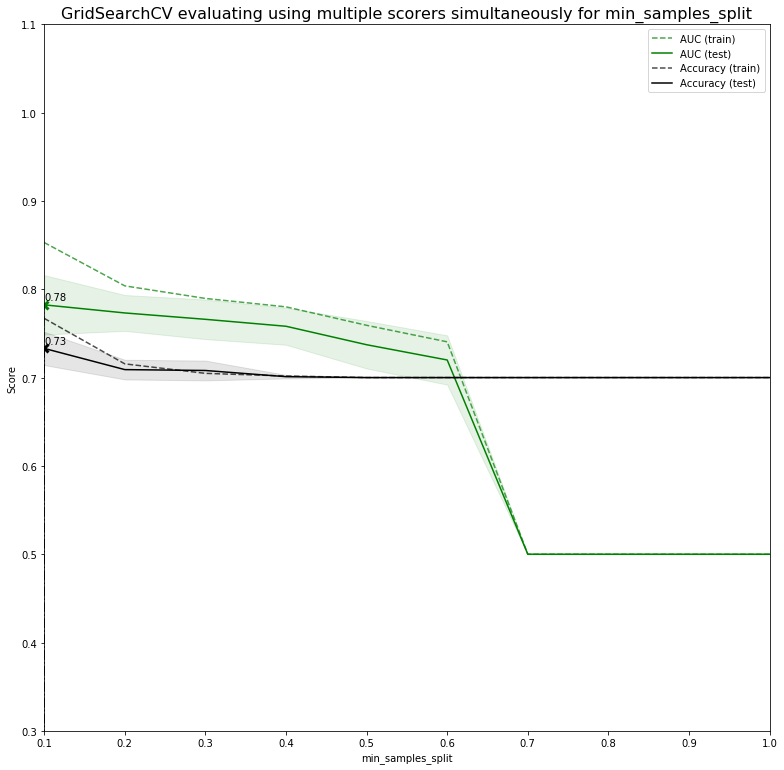

In [25]:
# another approach is to use GridsearchCV for each of the discussed hyperparameters
from sklearn.metrics import make_scorer


scoring = {'AUC': 'roc_auc', 'Accuracy': make_scorer(metrics.accuracy_score)}
clf = GridSearchCV(RandomForestClassifier(random_state=42, n_estimators=10, n_jobs=-1),
                  param_grid={'min_samples_split': np.linspace(0.1,1, 10, endpoint=True)},
                  scoring=scoring, cv=5, refit='AUC', return_train_score=True)
clf.fit(X, y)
results = clf.cv_results_

plt.figure(figsize=(13, 13))
plt.title("GridSearchCV evaluating using multiple scorers simultaneously for min_samples_split",
          fontsize=16)

plt.xlabel("min_samples_split")
plt.ylabel("Score")

ax = plt.gca()
ax.set_xlim(0.1, 1)
ax.set_ylim(0.3, 1.1)

# Get the regular numpy array from the MaskedArray
X_axis = np.array(results['param_min_samples_split'].data, dtype=float)

for scorer, color in zip(sorted(scoring), ['g', 'k']):
    for sample, style in (('train', '--'), ('test', '-')):
        sample_score_mean = results['mean_%s_%s' % (sample, scorer)]
        sample_score_std = results['std_%s_%s' % (sample, scorer)]
        ax.fill_between(X_axis, sample_score_mean - sample_score_std,
                        sample_score_mean + sample_score_std,
                        alpha=0.1 if sample == 'test' else 0, color=color)
        ax.plot(X_axis, sample_score_mean, style, color=color,
                alpha=1 if sample == 'test' else 0.7,
                label="%s (%s)" % (scorer, sample))

    best_index = np.nonzero(results['rank_test_%s' % scorer] == 1)[0][0]
    best_score = results['mean_test_%s' % scorer][best_index]

    # Plot a dotted vertical line at the best score for that scorer marked by x
    ax.plot([X_axis[best_index], ] * 2, [0, best_score],
            linestyle='-.', color=color, marker='x', markeredgewidth=3, ms=8)

    # Annotate the best score for that scorer
    ax.annotate("%0.2f" % best_score,
                (X_axis[best_index], best_score + 0.005))

plt.legend(loc="best")
plt.grid(False)
plt.show()

In [310]:
# most often this approach can also be a great one
# using random search
from sklearn.model_selection import RandomizedSearchCV

random_grid = {'n_estimators': list(range(1, 200, 10)), # some of these values can be extracted from a distribution
               'max_depth': np.linspace(1,41, 21, endpoint=True),
               'min_samples_split': np.linspace(0.1,1, 10, endpoint=True),
               'min_samples_leaf': [1, 3, 5, 7, 10, 15]
              }

clf_random = RandomizedSearchCV(RandomForestClassifier(random_state=42), random_grid, cv=5, scoring = 'roc_auc', n_iter = 100)

clf_random.fit(X_train, y_train)
clf_random.best_params_

{'n_estimators': 191,
 'min_samples_split': 0.1,
 'min_samples_leaf': 7,
 'max_depth': 13.0}

No handles with labels found to put in legend.


CheckingAccountStatus.none        0.112244
CheckingAccountStatus.lt.0        0.111800
Amount                            0.099098
Duration                          0.086452
Age                               0.068943
CreditHistory.Critical            0.060163
CheckingAccountStatus.0.to.200    0.032980
CreditHistory.NoCredit.AllPaid    0.030530
Purpose.NewCar                    0.026508
Property.RealEstate               0.024713
dtype: float64


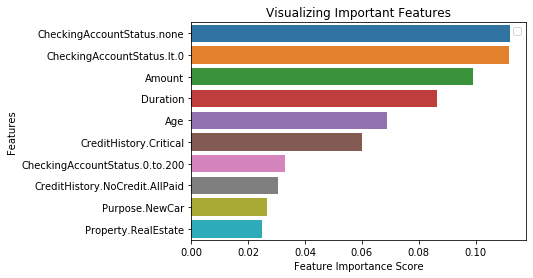

In [300]:
# here are the top 10 important factors
clf_random = RandomForestClassifier(n_estimators=161, min_samples_split=0.1, min_samples_leaf = 3, max_depth=27.0)
clf_random.fit(X_train, y_train)

feature_imp = pd.Series(clf_random.feature_importances_,index=X_train.columns.values).sort_values(ascending=False)
print(feature_imp[:10])

# barplot
sns.barplot(x=feature_imp[:10], y=feature_imp.index[:10])
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [340]:
# now using gridearchcv
tuned_params = {'n_estimators': [75, 100, 120],
               'max_depth': [7, 10, 15, 16, 17, 20],
               'min_samples_split': [.001, .005, .01, .05, .1],
              }

clf_grid = GridSearchCV(RandomForestClassifier(random_state=42, n_jobs=-1), tuned_params, cv=5, scoring = 'roc_auc')

clf_grid.fit(X_train, y_train)
clf_grid.best_params_

{'max_depth': 7, 'min_samples_split': 0.01, 'n_estimators': 75}

{'accuracy': 0.9514285714285714, 'roc_auc_score': 0.998226449293016, 'Roc_Auc': 0.9200343016400472}
              precision    recall  f1-score   support

           0       0.99      0.84      0.91       209
           1       0.94      1.00      0.97       491

    accuracy                           0.95       700
   macro avg       0.97      0.92      0.94       700
weighted avg       0.95      0.95      0.95       700



No handles with labels found to put in legend.


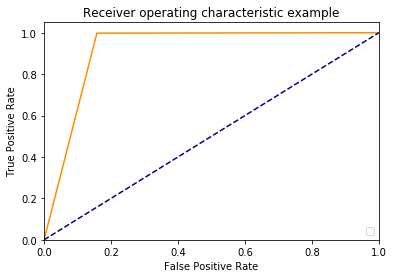

**************************************************
{'accuracy': 0.7633333333333333, 'roc_auc_score': 0.8055628581944372, 'Roc_Auc': 0.6533203638466796}
              precision    recall  f1-score   support

           0       0.71      0.37      0.49        91
           1       0.77      0.93      0.85       209

    accuracy                           0.76       300
   macro avg       0.74      0.65      0.67       300
weighted avg       0.75      0.76      0.74       300



No handles with labels found to put in legend.


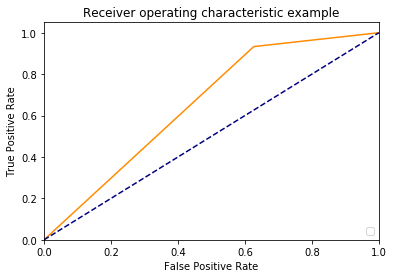

In [26]:
# basic random Forest Classifier
clf_final = RandomForestClassifier(n_estimators=100, max_depth=16.0, min_samples_split=0.01, n_jobs=-1, random_state=42)
clf_final = clf_final.fit(X_train, y_train)

# report model performance on training set
result_training = classification_metrics(clf_final, y_train, X_train)
print(result_training)
print(classification_report(y_train, clf_final.predict(X_train)))
roc_plot(clf_final, y_train, X_train)

print("*****"*10)
# report model performance on test set
result_test = classification_metrics(clf_final, y_test, X_test)
print(result_test)
print(classification_report(y_test, clf_final.predict(X_test)))
roc_plot(clf_final, y_test, X_test)

As mentioned, there are certain ways to "peek" into a model created by the Random Forests algorithm. The first, and most popular one, is the Feature Importance calculation functionality. This allows the ML practitioner to see an ordering of the importance of the features that have contributed the most to the predictive accuracy of the model. 

You can see how to use this in the scikit-learn documentation (http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier.feature_importances_). Now, if you tried this, you would just get an ordered table of not directly interpretable numeric values. Thus, it's much more useful to show the feature importance in a visual way. You can see an example of how that's done here: http://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html#sphx-glr-auto-examples-ensemble-plot-forest-importances-py

Now you try! Let's visualize the importance of features from your Random Forests model!

No handles with labels found to put in legend.


Amount                        0.106562
Duration                      0.087727
Age                           0.084739
CheckingAccountStatus.none    0.055298
CheckingAccountStatus.lt.0    0.045027
CreditHistory.Critical        0.032292
InstallmentRatePercentage     0.032213
ResidenceDuration             0.028577
Purpose.NewCar                0.022935
SavingsAccountBonds.lt.100    0.019086
dtype: float64


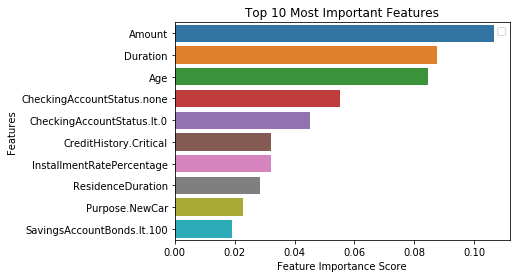

In [27]:
# here are the top 10 important factors 
feature_imp = pd.Series(clf_final.feature_importances_,index=X_train.columns.values).sort_values(ascending=False)
print(feature_imp[:10])

# barplot
sns.barplot(x=feature_imp[:10], y=feature_imp.index[:10])
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Top 10 Most Important Features")
plt.legend()
plt.show()

A final method for gaining some insight into the inner working of your Random Forests models is a so-called Partial Dependence Plot. The Partial Dependence Plot (PDP or PD plot) shows the marginal effect of a feature on the predicted outcome of a previously fit model. The prediction function is fixed at a few values of the chosen features and averaged over the other features. A partial dependence plot can show if the relationship between the target and a feature is linear, monotonic or more complex. 

In scikit-learn, PDPs are implemented and available for certain algorithms, but at this point (version 0.20.0) they are not yet implemented for Random Forests. Thankfully, there is an add-on package called **PDPbox** (https://pdpbox.readthedocs.io/en/latest/) which adds this functionality to Random Forests. The package is easy to install through pip.

In [28]:
# ! pip install pdpbox
from pdpbox import pdp, info_plots

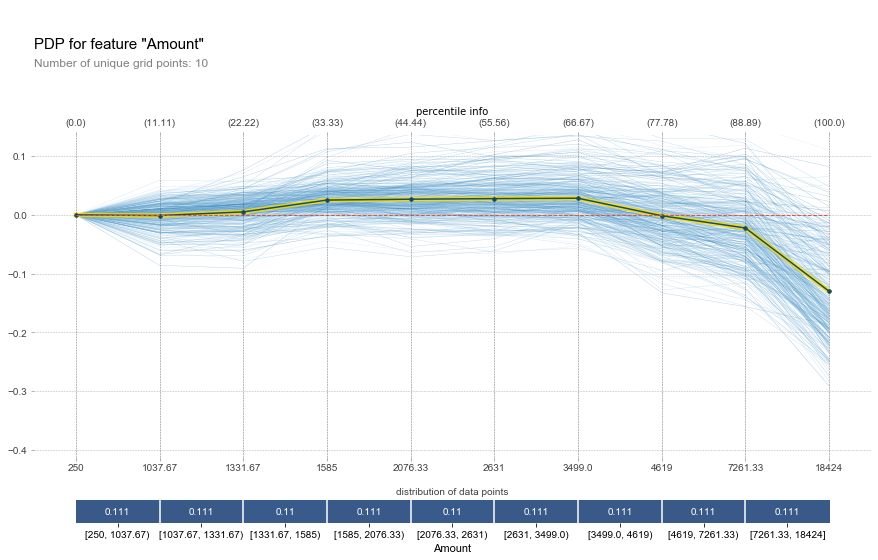

In [29]:
# using pdp on the first four most important features
# 1) Amount
pdp_amount = pdp.pdp_isolate(
    model=clf_final, dataset=X_train, model_features=X_train.columns.values, feature='Amount'
)
fig, axes = pdp.pdp_plot(pdp_amount, 'Amount', plot_lines=True, plot_pts_dist=True, frac_to_plot=0.5, 
                         x_quantile=True, show_percentile=True)

While we encourage you to read the documentation for the package (and reading package documentation in general is a good habit to develop), the authors of the package have also written an excellent blog post on how to use it, showing examples on different algorithms from scikit-learn (the Random Forests example is towards the end of the blog post): https://briangriner.github.io/Partial_Dependence_Plots_presentation-BrianGriner-PrincetonPublicLibrary-4.14.18-updated-4.22.18.html

So, armed with this new knowledge, feel free to pick a few features, and make a couple of Partial Dependence Plots of your own!

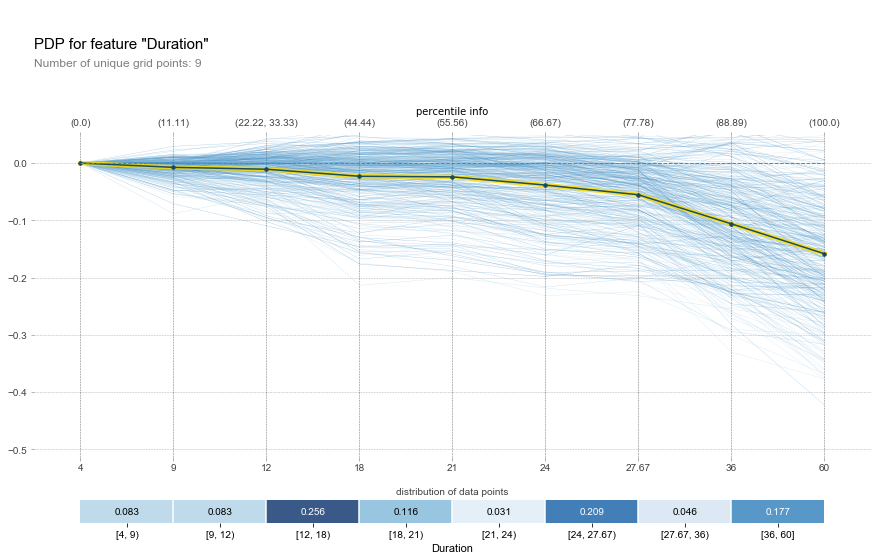

In [30]:
# 2) Duration
pdp_duration = pdp.pdp_isolate(
    model=clf_final, dataset=X_train, model_features=X_train.columns.values, feature='Duration'
)
fig, axes = pdp.pdp_plot(pdp_duration, 'Duration', plot_lines=True, plot_pts_dist=True, frac_to_plot=0.5,
                        x_quantile=True, show_percentile=True)

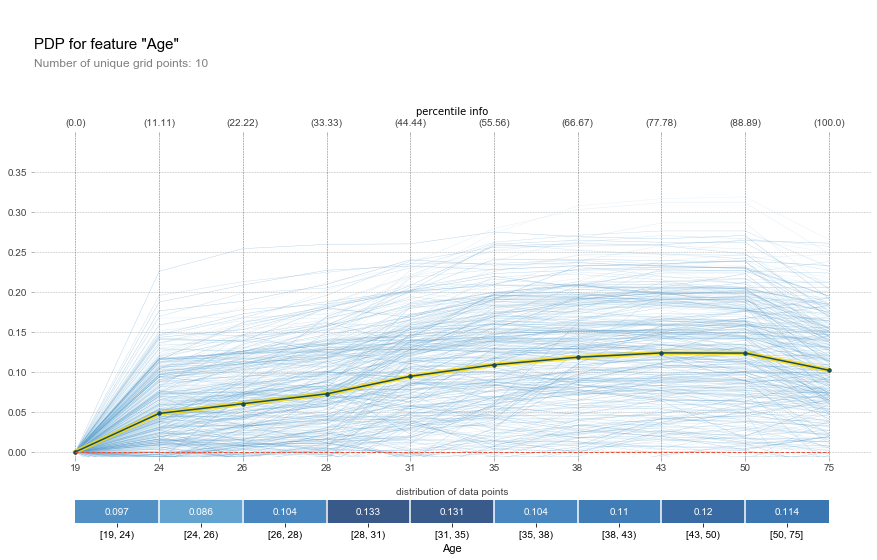

In [31]:
# 3) Age
pdp_age = pdp.pdp_isolate(
    model=clf_final, dataset=X_train, model_features=X_train.columns.values, feature='Age'
)
fig, axes = pdp.pdp_plot(pdp_age, 'Age', plot_lines=True, plot_pts_dist=True, frac_to_plot=0.5,
                        x_quantile=True, show_percentile=True)

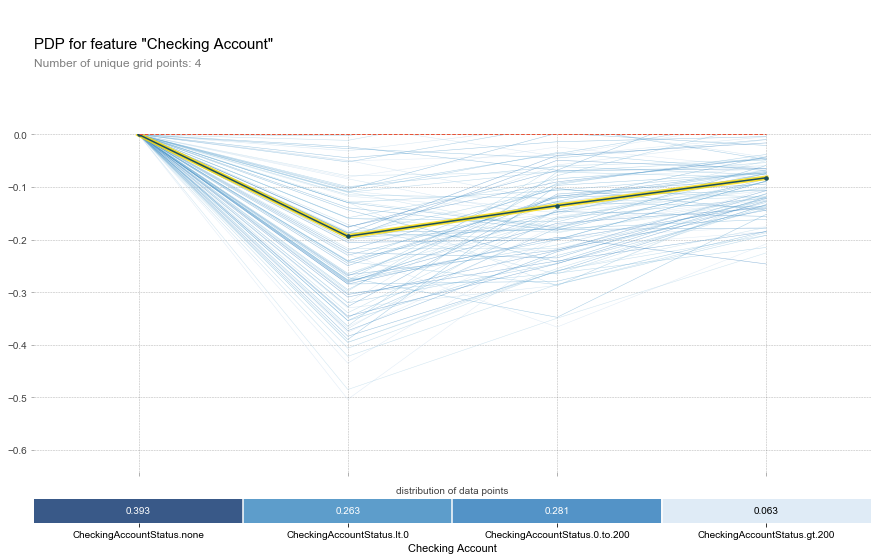

In [32]:
# Checking account status
pdp_checkingaccount = pdp.pdp_isolate(model=clf_final, dataset=X_train, model_features=X_train.columns.values, 
                                     feature=['CheckingAccountStatus.none','CheckingAccountStatus.lt.0', 
                                              'CheckingAccountStatus.0.to.200','CheckingAccountStatus.gt.200'])

fig, axes = pdp.pdp_plot(pdp_checkingaccount, 'Checking Account', center=True, 
                         plot_lines=True, frac_to_plot=100, plot_pts_dist=True)

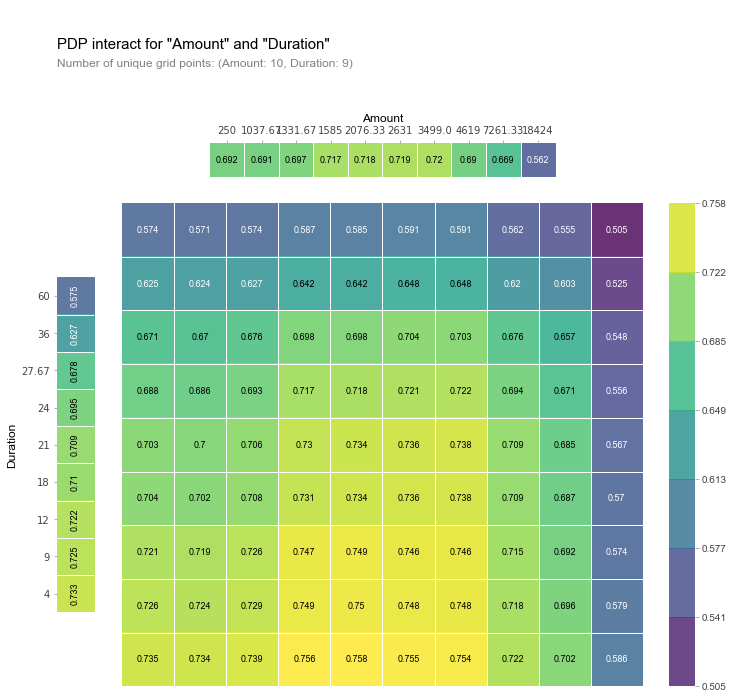

In [33]:
# checking interactions
inter_amount_duration = pdp.pdp_interact(model=clf_final, dataset=X_train, model_features=X_train.columns.values,
                                        features=['Amount','Duration'])

fig, axes = pdp.pdp_interact_plot(inter_amount_duration, feature_names = ['Amount','Duration'], plot_type='grid',
                                 x_quantile=False, plot_pdp=True, 
                                  plot_params = {'font_family': 'Arial','cmap': 'viridis','inter_fontsize': 9})

## (Optional) Advanced Boosting-Based Algorithms

As explained in the video lectures, the next generation of algorithms after Random Forests (that use Bagging, a.k.a. Bootstrap Aggregation) were developed using Boosting, and the first one of these were Gradient Boosted Machines, which are implemented in scikit-learn (http://scikit-learn.org/stable/modules/ensemble.html#gradient-tree-boosting).

Still, in recent years, a number of variations on GBMs have been developed by different research amd industry groups, all of them bringing improvements, both in speed, accuracy and functionality to the original Gradient Boosting algorithms.

In no order of preference, these are:
1. **XGBoost**: https://xgboost.readthedocs.io/en/latest/
2. **CatBoost**: https://tech.yandex.com/catboost/
3. **LightGBM**: https://lightgbm.readthedocs.io/en/latest/

If you're using the Anaconda distribution, these are all very easy to install:

In [35]:
# ! conda install -c anaconda py-xgboost
# ! conda install -c conda-forge catboost
# ! conda install -c conda-forge lightgbm

In [7]:
from sklearn.model_selection import StratifiedKFold
import seaborn as sns
import catboost
import catboost.datasets
import xgboost
import lightgbm as lgb
import numpy as np
from skopt import gp_minimize
from skopt.space import Real, Integer
from skopt.utils import use_named_args
from skopt.plots import plot_convergence
import pprint
import shap
pp = pprint.PrettyPrinter(indent=4)
%matplotlib inline


class ModelOptimizer:
    best_score = None
    opt = None
    
    def __init__(self, model, X_train, y_train, categorical_columns_indices=None, n_fold=5, seed=2405, early_stopping_rounds=30, is_stratified=False, is_shuffle=False):
        self.model = model
        self.X_train = X_train
        self.y_train = y_train
        self.categorical_columns_indices = categorical_columns_indices
        self.n_fold = n_fold
        self.seed = seed
        self.early_stopping_rounds = early_stopping_rounds
        self.is_stratified = is_stratified
        self.is_shuffle = is_shuffle
        
        
    def update_model(self, **kwargs):
        for k, v in kwargs.items():
            setattr(self.model, k, v)
            
    def evaluate_model(self):
        pass
    
    def optimize(self, param_space, max_evals=10, n_random_starts=2):
        start_time = time.time()
        
        @use_named_args(param_space)
        def _minimize(**params):
            self.model.set_params(**params)
            return self.evaluate_model()
        
        opt = gp_minimize(_minimize, param_space, n_calls=max_evals, n_random_starts=n_random_starts, random_state=2405, n_jobs=-1)
        best_values = opt.x
        optimal_values = dict(zip([param.name for param in param_space], best_values))
        best_score = opt.fun
        self.best_score = best_score
        self.opt = opt
        
        print('optimal_parameters: {}\noptimal score: {}\noptimization time: {}'.format(optimal_values, best_score, time.time() - start_time))
        print('updating model with optimal values')
        self.update_model(**optimal_values)
        plot_convergence(opt)
        return optimal_values

class XgbOptimizer(ModelOptimizer):
    def evaluate_model(self):
        scores = xgboost.cv(self.model.get_xgb_params(), 
                    xgboost.DMatrix(self.X_train, label=self.y_train),
                    num_boost_round=self.model.n_estimators, 
                    metrics='auc', 
                    nfold=self.n_fold, 
                    stratified=self.is_stratified,
                    shuffle=self.is_shuffle,
                    seed=self.seed,
                    early_stopping_rounds=self.early_stopping_rounds)
        self.scores = scores
        test_scores = scores.iloc[:, 2]
        best_metric = test_scores.max()
        return 1 - best_metric
    
class CatboostOptimizer(ModelOptimizer):
    def evaluate_model(self):
        validation_scores = catboost.cv(
        catboost.Pool(self.X_train, 
                      self.y_train, 
                      cat_features=self.categorical_columns_indices),
        self.model.get_params(), 
        nfold=self.n_fold,
        stratified=self.is_stratified,
        seed=self.seed,
        early_stopping_rounds=self.early_stopping_rounds,
        shuffle=self.is_shuffle,
#         eval_metric='AUC',
        plot=False)
        self.scores = validation_scores
        test_scores = validation_scores.iloc[:, 2]
        best_metric = test_scores.max()
        return 1 - best_metric
    
class LightGBMOptimizer(ModelOptimizer):
    def evaluate_model(self):
        lgb_dataset = lgb.Dataset(self.X_train, 
                                  self.y_train, 
                                  self.categorical_columns_indices)
        eval_hist = lgb.cv(self.model.get_params(), 
                           lgb_dataset,
                           self.model.n_estimators, 
                           nfold=self.n_fold,
                           seed=self.seed, 
                           stratified=self.is_stratified, 
                           shuffle=self.is_shuffle,
                           early_stopping_rounds=self.early_stopping_rounds, 
                           metrics='auc')
        self.scores = eval_hist
        test_scores = eval_hist[list(eval_hist.keys())[0]]
        best_metric = max(test_scores)
        return 1 - best_metric

C:\Users\Farzad\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [40]:
# using XGBOOST

default_xgb = xgboost.XGBClassifier(
        objective='binary:logistic',
        n_jobs=-1
    )

default_xgb_optimizer = XgbOptimizer(default_xgb, X_train, y_train)
default_xgb_optimizer.evaluate_model()

0.2369806000000001

C:\Users\Farzad\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Farzad\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


optimal_parameters: {'learning_rate': 0.3166509192556906}
optimal score: 0.23571360000000008
optimization time: 8.257000923156738
updating model with optimal values


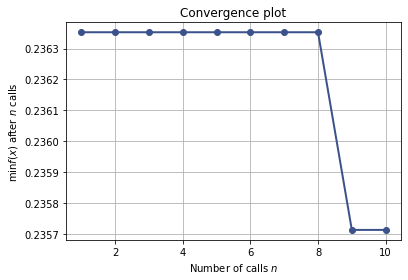

In [41]:
# tuning XGBoost # sequentially
xgb = xgboost.XGBClassifier(
        n_estimators=100, # use large n_estimators deliberately to make use of the early stopping
        objective='binary:logistic',
        n_jobs=-1
    )

optimizer = XgbOptimizer(xgb, X_train, y_train)
params_space = [Real(0.01, 0.8, name='learning_rate')]
optimal_learning_rate = optimizer.optimize(params_space)

C:\Users\Farzad\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Farzad\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Farzad\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Farzad\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Farzad\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\skop

optimal_parameters: {'max_depth': 2, 'min_child_weight': 20}
optimal score: 0.23460380000000003
optimization time: 6.2399983406066895
updating model with optimal values


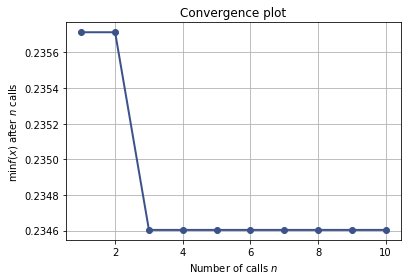

In [42]:
params_space = [
    Integer(2, 10, name='max_depth'), 
    Integer(1, 20, name='min_child_weight')
]
optimal_values = optimizer.optimize(params_space)

C:\Users\Farzad\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Farzad\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Farzad\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Farzad\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


optimal_parameters: {'subsample': 1.0, 'colsample_bytree': 0.5}
optimal score: 0.22685540000000004
optimization time: 6.219963073730469
updating model with optimal values


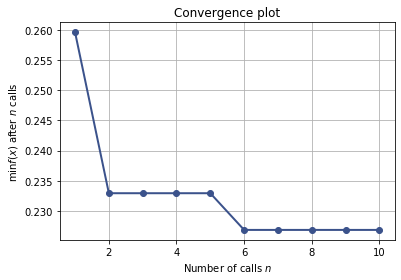

In [43]:
params_space = [
    Real(0.5, 1.0, name='subsample'), 
    Real(0.5, 1.0, name='colsample_bytree')
]
optimal_values = optimizer.optimize(params_space)

C:\Users\Farzad\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Farzad\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


optimal_parameters: {'scale_pos_weight': 1.0, 'reg_lambda': 0.0}
optimal score: 0.22366240000000004
optimization time: 6.2559592723846436
updating model with optimal values


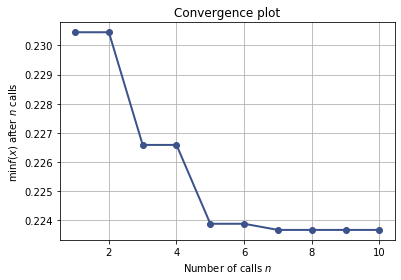

In [44]:
params_space = [
    Real(1.0, 16.0, name='scale_pos_weight'), 
    Real(0.0, 100, name='reg_lambda')
]
optimal_values = optimizer.optimize(params_space)

In [45]:
optimizer.model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0,
              learning_rate=0.3166509192556906, max_delta_step=0, max_depth=2,
              min_child_weight=20, missing=None, n_estimators=100, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=0.0, scale_pos_weight=1.0, seed=None,
              silent=None, subsample=1.0, verbosity=1)

optimal_parameters: {'learning_rate': 0.8, 'max_depth': 2, 'min_child_weight': 6, 'subsample': 0.5011529042928791, 'colsample_bytree': 1.0, 'scale_pos_weight': 16.0, 'reg_lambda': 90.03879059476303}
optimal score: 0.2148538000000001
optimization time: 121.12366795539856
updating model with optimal values


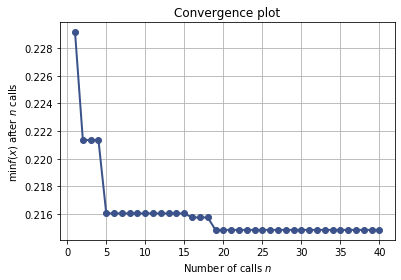

In [61]:
# tuning XGBoost # all at once

xgb = xgboost.XGBClassifier(
        n_estimators=10000, # use large n_estimators deliberately to make use of the early stopping
        objective='binary:logistic',
        n_jobs=-1
    )
one_optimizer = XgbOptimizer(xgb, X_train, y_train)
params_space = [Real(0.01, 0.8, name='learning_rate'), 
                Integer(2, 10, name='max_depth'), 
                Integer(1, 20, name='min_child_weight'), 
                Real(0.5, 1.0, name='subsample'), 
                Real(0.5, 1.0, name='colsample_bytree'), 
                Real(1.0, 16.0, name='scale_pos_weight'), 
                Real(0.0, 100, name='reg_lambda')]
one_optimal_values = one_optimizer.optimize(params_space, max_evals=40)

In [62]:
one_optimizer.model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1.0, gamma=0,
              learning_rate=0.8, max_delta_step=0, max_depth=2,
              min_child_weight=6, missing=None, n_estimators=10000, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=90.03879059476303, scale_pos_weight=16.0,
              seed=None, silent=None, subsample=0.5011529042928791,
              verbosity=1)

In [48]:
optimizer.model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0,
              learning_rate=0.3166509192556906, max_delta_step=0, max_depth=2,
              min_child_weight=20, missing=None, n_estimators=100, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=0.0, scale_pos_weight=1.0, seed=None,
              silent=None, subsample=1.0, verbosity=1)

In [64]:
clf_xgb = xgboost.XGBClassifier(
        bbase_score=0.5, booster='gbtree', colsample_bylevel=1,
        colsample_bynode=1, colsample_bytree=1.0, gamma=0,
        learning_rate=0.8, max_delta_step=0, max_depth=2,
        min_child_weight=6, missing=None, n_estimators=10000, n_jobs=-1,
        nthread=None, objective='binary:logistic', random_state=0,
        reg_alpha=0, reg_lambda=90.03879059476303, scale_pos_weight=16.0,
        seed=None, silent=None, subsample=0.5011529042928791,
        verbosity=1)

clf_xgb.fit(X_train, y_train,
           eval_set = [(X_train, y_train), (X_test, y_test)], verbose=1000)

[0]	validation_0-error:0.298571	validation_1-error:0.303333
[1000]	validation_0-error:0.135714	validation_1-error:0.246667
[2000]	validation_0-error:0.071429	validation_1-error:0.24
[3000]	validation_0-error:0.047143	validation_1-error:0.266667
[4000]	validation_0-error:0.031429	validation_1-error:0.256667
[5000]	validation_0-error:0.02	validation_1-error:0.263333
[6000]	validation_0-error:0.012857	validation_1-error:0.256667
[7000]	validation_0-error:0.01	validation_1-error:0.263333
[8000]	validation_0-error:0.011429	validation_1-error:0.256667
[9000]	validation_0-error:0.004286	validation_1-error:0.256667
[9999]	validation_0-error:0.004286	validation_1-error:0.253333


XGBClassifier(base_score=0.5, bbase_score=0.5, booster='gbtree',
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1.0,
              gamma=0, learning_rate=0.8, max_delta_step=0, max_depth=2,
              min_child_weight=6, missing=None, n_estimators=10000, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=90.03879059476303, scale_pos_weight=16.0,
              seed=None, silent=None, subsample=0.5011529042928791,
              verbosity=1)

{'accuracy': 0.9957142857142857, 'roc_auc_score': 1.0, 'Roc_Auc': 0.992822966507177}
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       209
           1       0.99      1.00      1.00       491

    accuracy                           1.00       700
   macro avg       1.00      0.99      0.99       700
weighted avg       1.00      1.00      1.00       700



No handles with labels found to put in legend.


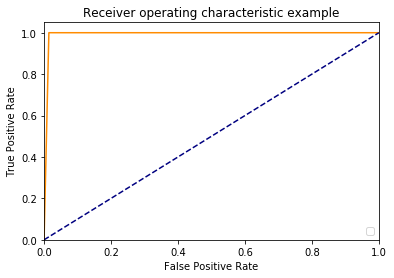

**************************************************
{'accuracy': 0.7466666666666667, 'roc_auc_score': 0.7541143067458858, 'Roc_Auc': 0.6506651243493349}
              precision    recall  f1-score   support

           0       0.63      0.41      0.49        91
           1       0.78      0.89      0.83       209

    accuracy                           0.75       300
   macro avg       0.70      0.65      0.66       300
weighted avg       0.73      0.75      0.73       300



No handles with labels found to put in legend.


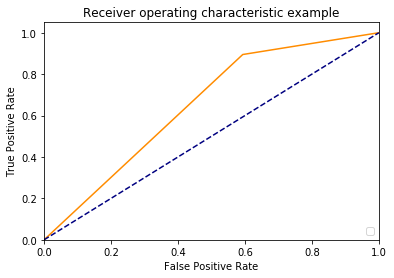

In [65]:
# report model performance on training set
result_training = classification_metrics(clf_xgb, y_train, X_train)
print(result_training)
print(classification_report(y_train, clf_xgb.predict(X_train)))
roc_plot(clf_xgb, y_train, X_train)

print("*****"*10)
# report model performance on test set
result_test = classification_metrics(clf_xgb, y_test, X_test)
print(result_test)
print(classification_report(y_test, clf_xgb.predict(X_test)))
roc_plot(clf_xgb, y_test, X_test)

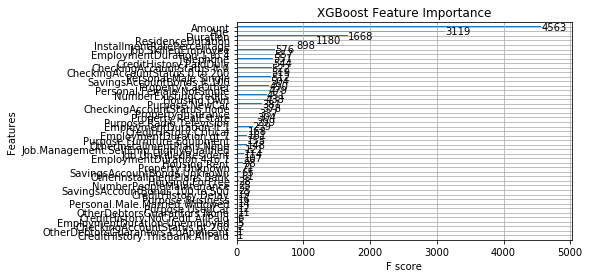

In [66]:
xgboost.plot_importance(clf_xgb, title='XGBoost Feature Importance')

In [60]:
# now using lightgbm
default_lgbm = lgb.LGBMClassifier(
        objective='binary',
        n_jobs=-1
    )

default_lgbm_optimizer = LightGBMOptimizer(default_lgbm, X_train, y_train)
default_lgbm_optimizer.evaluate_model()

C:\Users\Farzad\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\lightgbm\engine.py:430: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Farzad\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\lightgbm\basic.py:741: UserWarning: silent keyword has been found in `params` and will be ignored.
Please use silent argument of the Dataset constructor to pass this parameter.
  .format(key))


0.23590614228913198

C:\Users\Farzad\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\lightgbm\engine.py:430: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Farzad\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\lightgbm\basic.py:741: UserWarning: silent keyword has been found in `params` and will be ignored.
Please use silent argument of the Dataset constructor to pass this parameter.
  .format(key))
C:\Users\Farzad\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\lightgbm\engine.py:430: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Farzad\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\lightgbm\basic.py:741: UserWarning: silent keyword has been found in `params` and will be ignored.
Please use silent argument o

C:\Users\Farzad\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\lightgbm\basic.py:741: UserWarning: silent keyword has been found in `params` and will be ignored.
Please use silent argument of the Dataset constructor to pass this parameter.
  .format(key))
C:\Users\Farzad\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\lightgbm\engine.py:430: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Farzad\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\lightgbm\basic.py:741: UserWarning: silent keyword has been found in `params` and will be ignored.
Please use silent argument of the Dataset constructor to pass this parameter.
  .format(key))
C:\Users\Farzad\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\lightgbm\engine.py:430: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Foun

C:\Users\Farzad\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\lightgbm\engine.py:430: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Farzad\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\lightgbm\basic.py:741: UserWarning: silent keyword has been found in `params` and will be ignored.
Please use silent argument of the Dataset constructor to pass this parameter.
  .format(key))
C:\Users\Farzad\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\lightgbm\engine.py:430: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Farzad\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\lightgbm\basic.py:741: UserWarning: silent keyword has been found in `params` and will be ignored.
Please use silent argument o

optimal_parameters: {'learning_rate': 0.5019509701374532, 'max_depth': 2, 'min_child_weight': 1, 'min_child_samples': 27, 'subsample': 0.5447167916500388, 'colsample_bytree': 0.5, 'scale_pos_weight': 9.901495889693377, 'reg_lambda': 42.18705688989816}
optimal score: 0.2240786776901269
optimization time: 54.673383474349976
updating model with optimal values


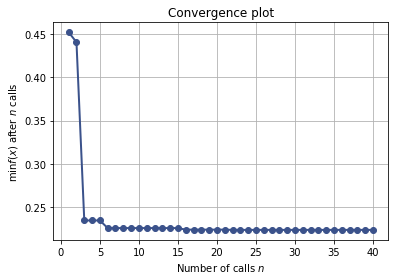

In [67]:
# onestep optimization
lgbm = lgb.LGBMClassifier(n_estimators=10000, # use large n_estimators deliberately to make use of the early stopping
        objective='binary',
        n_jobs=-1)
lgbm_optimizer = LightGBMOptimizer(lgbm, X_train, y_train)
params_space = [Real(0.01, 0.8, name='learning_rate'), 
                Integer(2, 12, name='max_depth'), 
                Integer(1, 20, name='min_child_weight'),
                Integer(10, 50, name='min_child_samples'),
                Real(0.5, 1.0, name='subsample'), 
                Real(0.5, 1.0, name='colsample_bytree'), 
                Real(1.0, 16.0, name='scale_pos_weight'), 
                Real(0.0, 100, name='reg_lambda')]
lgbm_optimal_values = lgbm_optimizer.optimize(params_space, max_evals=40, n_random_starts=4)

In [68]:
lgbm_optimizer.model

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.8, max_depth=2,
               min_child_samples=49, min_child_weight=9, min_split_gain=0.0,
               n_estimators=10000, n_jobs=-1, num_leaves=31, objective='binary',
               random_state=None, reg_alpha=0.0, reg_lambda=0.0,
               scale_pos_weight=8.83717903185126, silent=True,
               subsample=0.7052147862058247, subsample_for_bin=200000,
               subsample_freq=0)

In [70]:
clf_lgbm = lgb.LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.8, max_depth=2,
               min_child_samples=49, min_child_weight=9, min_split_gain=0.0,
               n_estimators=10000, n_jobs=-1, num_leaves=31, objective='binary',
               random_state=None, reg_alpha=0.0, reg_lambda=0.0,
               scale_pos_weight=8.83717903185126, silent=True,
               subsample=0.7052147862058247, subsample_for_bin=200000,
               subsample_freq=0)

clf_lgbm.fit(X_train, y_train,
           eval_set = [(X_train, y_train), (X_test, y_test)], verbose=1000)

[1000]	training's binary_logloss: 0.0508962	valid_1's binary_logloss: 1.12154
[2000]	training's binary_logloss: 0.0320357	valid_1's binary_logloss: 1.1894
[3000]	training's binary_logloss: 0.028882	valid_1's binary_logloss: 1.20491
[4000]	training's binary_logloss: 0.0276802	valid_1's binary_logloss: 1.21749
[5000]	training's binary_logloss: 0.027162	valid_1's binary_logloss: 1.22348
[6000]	training's binary_logloss: 0.0267299	valid_1's binary_logloss: 1.23126
[7000]	training's binary_logloss: 0.0264611	valid_1's binary_logloss: 1.23598
[8000]	training's binary_logloss: 0.026249	valid_1's binary_logloss: 1.24094
[9000]	training's binary_logloss: 0.0260758	valid_1's binary_logloss: 1.24646
[10000]	training's binary_logloss: 0.0259428	valid_1's binary_logloss: 1.25066


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.8, max_depth=2,
               min_child_samples=49, min_child_weight=9, min_split_gain=0.0,
               n_estimators=10000, n_jobs=-1, num_leaves=31, objective='binary',
               random_state=None, reg_alpha=0.0, reg_lambda=0.0,
               scale_pos_weight=8.83717903185126, silent=True,
               subsample=0.7052147862058247, subsample_for_bin=200000,
               subsample_freq=0)

{'accuracy': 1.0, 'roc_auc_score': 1.0, 'Roc_Auc': 1.0}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       209
           1       1.00      1.00      1.00       491

    accuracy                           1.00       700
   macro avg       1.00      1.00      1.00       700
weighted avg       1.00      1.00      1.00       700



No handles with labels found to put in legend.


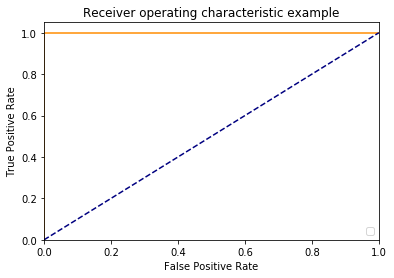

**************************************************
{'accuracy': 0.75, 'roc_auc_score': 0.7413113202586886, 'Roc_Auc': 0.643750985856249}
              precision    recall  f1-score   support

           0       0.65      0.37      0.48        91
           1       0.77      0.91      0.84       209

    accuracy                           0.75       300
   macro avg       0.71      0.64      0.66       300
weighted avg       0.73      0.75      0.73       300



No handles with labels found to put in legend.


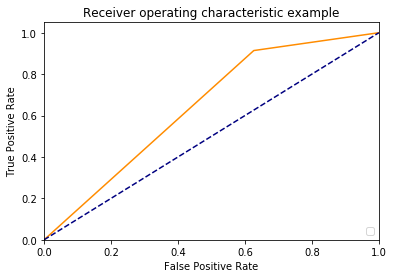

In [71]:
# report model performance on training set
result_training = classification_metrics(clf_lgbm, y_train, X_train)
print(result_training)
print(classification_report(y_train, clf_lgbm.predict(X_train)))
roc_plot(clf_lgbm, y_train, X_train)

print("*****"*10)
# report model performance on test set
result_test = classification_metrics(clf_lgbm, y_test, X_test)
print(result_test)
print(classification_report(y_test, clf_lgbm.predict(X_test)))
roc_plot(clf_lgbm, y_test, X_test)

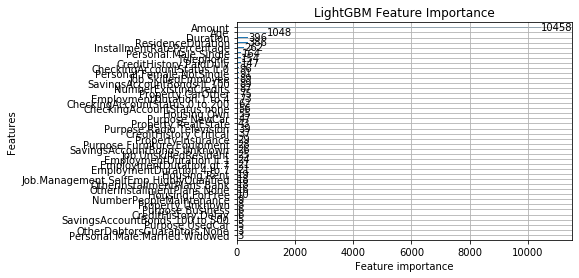

In [73]:
lgb.plot_importance(clf_lgbm, title='LightGBM Feature Importance')

In [74]:
# using catboost
default_cb = catboost.CatBoostClassifier(loss_function='Logloss', eval_metric='AUC', silent=True)
default_cb_optimizer = CatboostOptimizer(default_cb, X_train, y_train)
default_cb_optimizer.evaluate_model()

0.9413929264324028

optimal_parameters: {'learning_rate': 0.8, 'max_depth': 10, 'colsample_bylevel': 0.5, 'scale_pos_weight': 16.0, 'bagging_temperature': 19.455828960651406, 'random_strength': 0.0, 'reg_lambda': 100.0}
optimal score: 0.8787847126369442
optimization time: 2663.410267829895
updating model with optimal values


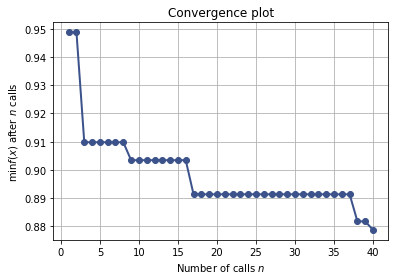

In [75]:
# one step optimizer
cb = catboost.CatBoostClassifier(n_estimators=4000, # use large n_estimators deliberately to make use of the early stopping
#                          one_hot_max_size=2,
                         loss_function='Logloss',
                         eval_metric='AUC',
                         boosting_type='Ordered', # use permutations
                         random_seed=2405, 
                         use_best_model=True,
                         silent=True)
one_cb_optimizer = CatboostOptimizer(cb, X_train, y_train)
params_space = [Real(0.01, 0.8, name='learning_rate'), 
                Integer(2, 10, name='max_depth'), 
                Real(0.5, 1.0, name='colsample_bylevel'), 
                Real(1.0, 16.0, name='scale_pos_weight'), 
                Real(0.0, 100, name='bagging_temperature'), 
                Real(0.0, 100, name='random_strength'), 
                Real(1.0, 100, name='reg_lambda')]
one_cb_optimal_values = one_cb_optimizer.optimize(params_space, max_evals=40, n_random_starts=4)

In [76]:
one_cb_optimizer.model.get_params()

{'n_estimators': 4000,
 'boosting_type': 'Ordered',
 'eval_metric': 'AUC',
 'silent': True,
 'use_best_model': True,
 'random_seed': 2405,
 'loss_function': 'Logloss',
 'learning_rate': 0.8,
 'max_depth': 10,
 'colsample_bylevel': 0.5,
 'scale_pos_weight': 16.0,
 'bagging_temperature': 19.455828960651406,
 'random_strength': 0.0,
 'reg_lambda': 100.0}

In [11]:
clf_cb = catboost.CatBoostClassifier(n_estimators=4000,
                                     boosting_type='Ordered',
                                     eval_metric='AUC',
                                     silent=True,
                                     use_best_model= True,
                                     random_seed= 2405,
                                     loss_function= 'Logloss',
                                     learning_rate= 0.8,
                                     max_depth= 10,
                                     colsample_bylevel= 0.5,
                                     scale_pos_weight= 16.0,
                                     bagging_temperature= 19.455828960651406,
                                     random_strength= 0.0,
                                     reg_lambda= 100.0)

clf_cb = clf_cb.fit(X_train, y_train,eval_set=(X_test, y_test))

Your task in this optional section of the mini project is to read the documentation of these three libraries, and apply all of them to the "German Credit" dataset, just like you did in the case of Decision Trees and Random Forests.

The final deliverable of this section should be a table (can be a pandas DataFrame) which shows the accuracy of all the five algorthms taught in this mini project in one place.

Happy modeling! :)

{'accuracy': 0.87, 'roc_auc_score': 0.9864255157426988, 'Roc_Auc': 0.7822966507177034}
              precision    recall  f1-score   support

           0       1.00      0.56      0.72       209
           1       0.84      1.00      0.92       491

    accuracy                           0.87       700
   macro avg       0.92      0.78      0.82       700
weighted avg       0.89      0.87      0.86       700



No handles with labels found to put in legend.


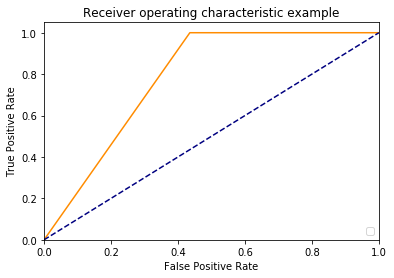

**************************************************
{'accuracy': 0.76, 'roc_auc_score': 0.8046164361953836, 'Roc_Auc': 0.6168042483831957}
              precision    recall  f1-score   support

           0       0.85      0.25      0.39        91
           1       0.75      0.98      0.85       209

    accuracy                           0.76       300
   macro avg       0.80      0.62      0.62       300
weighted avg       0.78      0.76      0.71       300



No handles with labels found to put in legend.


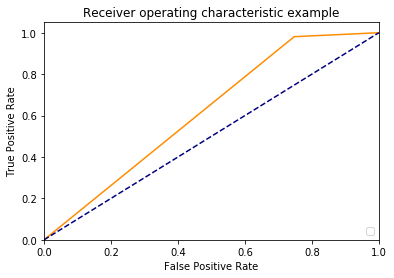

In [12]:
# report model performance on training set
result_training = classification_metrics(clf_cb, y_train, X_train)
print(result_training)
print(classification_report(y_train, clf_cb.predict(X_train)))
roc_plot(clf_cb, y_train, X_train)

print("*****"*10)
# report model performance on test set
result_test = classification_metrics(clf_cb, y_test, X_test)
print(result_test)
print(classification_report(y_test, clf_cb.predict(X_test)))
roc_plot(clf_cb, y_test, X_test)